# Análisis exploratorio de datos

## Importando librerías

In [2]:
import pandas as pd
import import_ipynb
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Self Made Library
import mylib

## Lectura de datos

In [4]:
df_parquet = mylib.read_parquet_azure("datamodel/fact_client_sales_model.parquet/part-00000-tid-6772648655752891251-0549fc5e-1457-4fb9-ac79-bd0a78dc9668-2105-1-c000.snappy.parquet")
df_parquet.head(5)

In [ ]:
df_parquet.columns

In [ ]:
value_counts = df_parquet[['SEMANA','PURCHASE']].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['SEMANA', 'COMPRA_SIGUIENTE_SEMANA','CUENTA']

In [ ]:
df_distribucion = df_value_counts_reset.sort_values(by='SEMANA', ascending=True).reset_index()

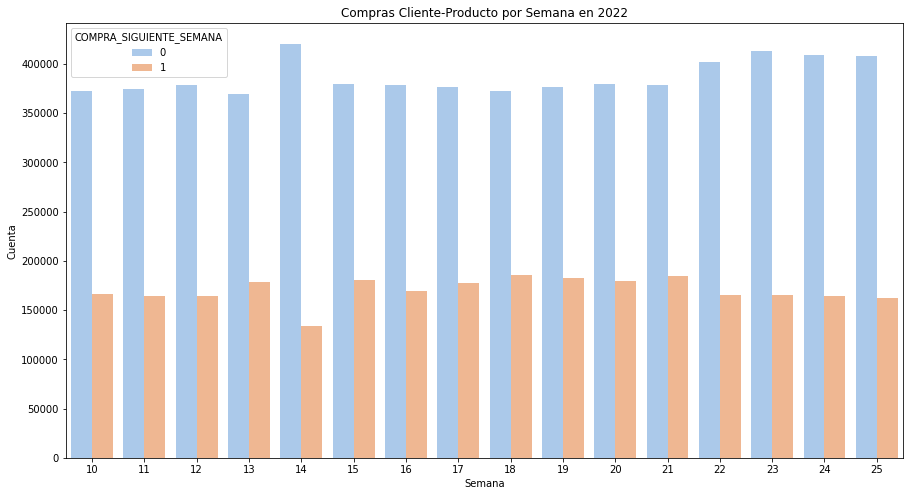

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=df_distribucion, x="SEMANA", y="CUENTA", hue="COMPRA_SIGUIENTE_SEMANA", palette=sns.color_palette("pastel", 8));
ax.set(xlabel='Semana')
ax.set(ylabel='Cuenta')
ax.set_title("Compras Cliente-Producto por Semana en 2022");

In [ ]:
print("Número de compras: "+str(df_parquet['PURCHASE'].sum()/df_parquet['PURCHASE'].count()))

Número de compras: 0.3056960147027226


In [ ]:
# Distribución compras y última compra

In [ ]:
df_dist = df_parquet[['CF','LAST_CF']].sample(100000)

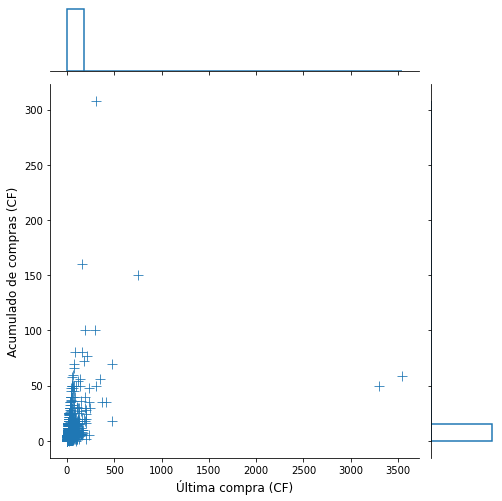

In [ ]:
ax = sns.jointplot(data=df_dist, x="CF", y="LAST_CF", height=7, marker="+", s=100, marginal_kws=dict(bins=20, fill=False));
ax.set_axis_labels('Última compra (CF)', 'Acumulado de compras (CF)', fontsize=12);

In [ ]:
df_dist.dtypes

CF         object
LAST_CF    object
dtype: object

In [ ]:
df_dist = df_dist.astype(float)
df_dist.describe()

,CF,LAST_CF
count,100000.000000,100000.000000
mean,4.501135,1.427467
std,17.613490,2.166860
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,1.000000
75%,4.000000,1.000000
max,3541.000000,308.000000


In [ ]:
%reset -f